# Лабораторная работа №2

## 1.1 Оценки математического ожидания, дисперсии, медианы

Пусть случайная величина $ \xi $ имеет распределение, задаваемое плотностью $ f_{\xi}(x) = \theta^2 x e^{-\theta x} $. Для каждого $ \theta \in \{0.5, 2, 8\} $:

1. (a) Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $ \xi $. Привести в отчет.

   (b) Для $ k \in \{24, 25, \dots, 215\} $ построить выборку из $ k $ элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все на графиках (для каждой оценки — свой график), где по вертикальной оси — оценка, а по горизонтальной — $ k $, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.



#### Часть 1(a): Аналитические вычисления

**1. Математическое ожидание $E[\xi]$:**

Для вычисления $E[\xi]$ используем интеграл:
$$
E[\xi] = \int_{0}^{\infty} x f_{\xi}(x) \, dx = \theta^2 \int_{0}^{\infty} x^2 e^{-\theta x} \, dx.
$$

Знаем, что
$$
\int_{0}^{\infty} x^n e^{-\theta x} \, dx = \frac{n!}{\theta^{n+1}}.
$$

Тогда,
$$
E[\xi] = \theta^2 \cdot \frac{2!}{\theta^{3}} = \theta^2 \cdot \frac{2}{\theta^3} = \frac{2}{\theta}.
$$

**2. Математическое ожидание квадрата $E[\xi^2]$:**

$$
E[\xi^2] = \int_{0}^{\infty} x^2 f_{\xi}(x) \, dx = \theta^2 \int_{0}^{\infty} x^3 e^{-\theta x} \, dx = \theta^2 \cdot \frac{3!}{\theta^{4}} = \theta^2 \cdot \frac{6}{\theta^4} = \frac{6}{\theta^2}.
$$

**3. Дисперсия $\text{Var}[\xi]$:**

$$
\text{Var}[\xi] = E[\xi^2] - (E[\xi])^2 = \frac{6}{\theta^2} - \left( \frac{2}{\theta} \right)^2 = \frac{6}{\theta^2} - \frac{4}{\theta^2} = \frac{2}{\theta^2}.
$$

**Итоговые формулы:**
$$
E[\xi] = \frac{2}{\theta}, \quad \text{Var}[\xi] = \frac{2}{\theta^2}, \quad E[\xi^2] = \frac{6}{\theta^2}.
$$

**Вычислим для заданных значений $\theta$:**

| $\theta$ | $E[\xi] = \frac{2}{\theta}$ | $\text{Var}[\xi] = \frac{2}{\theta^2}$ | $E[\xi^2] = \frac{6}{\theta^2}$ |
|-------------|-------------------------------|-----------------------------------------|-----------------------------------|
| 0.5         | $\frac{2}{0.5} = 4$       | $\frac{2}{0.25} = 8$                | $\frac{6}{0.25} = 24$         |
| 2           | $\frac{2}{2} = 1$         | $\frac{2}{4} = 0.5$                 | $\frac{6}{4} = 1.5$           |
| 8           | $\frac{2}{8} = 0.25$      | $\frac{2}{64} = 0.03125$            | $\frac{6}{64} = 0.09375$      |

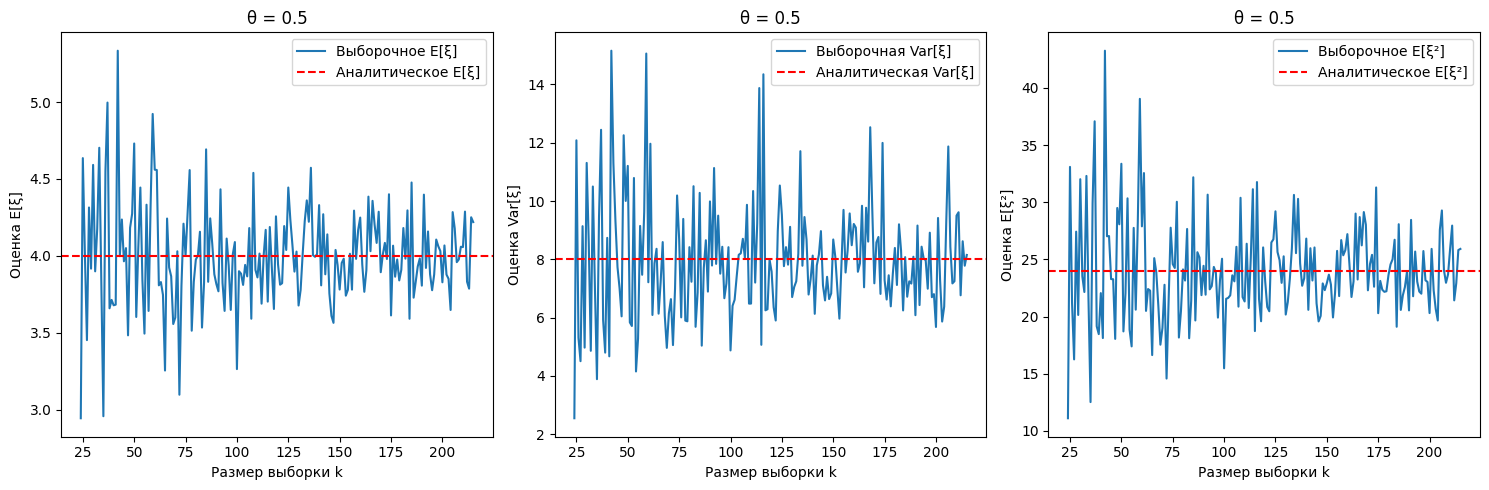

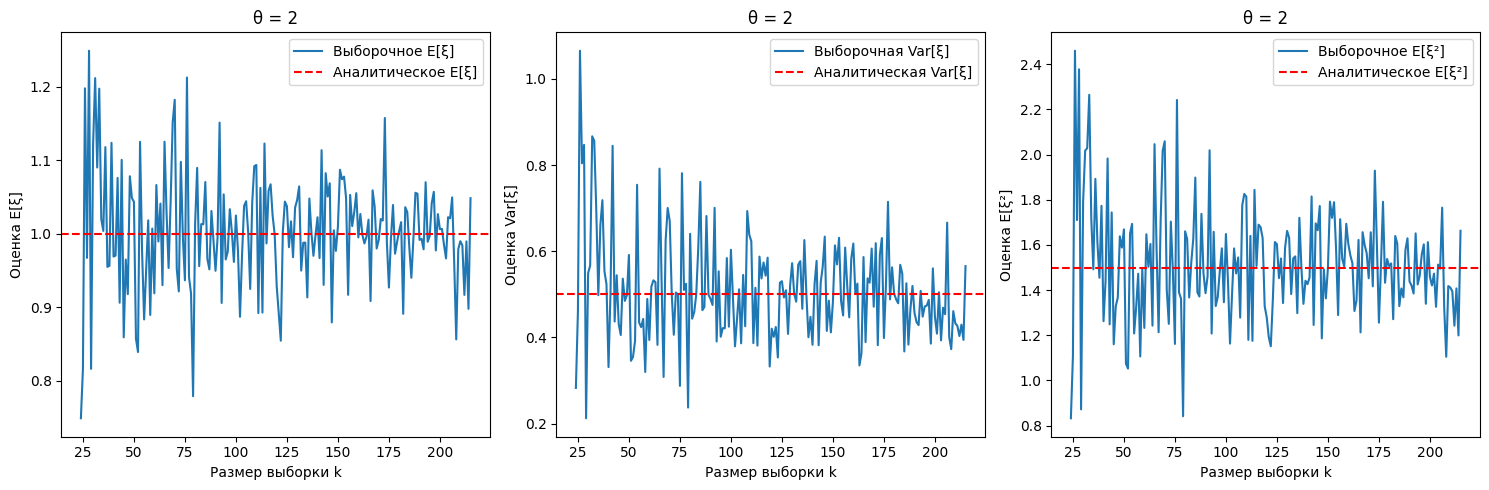

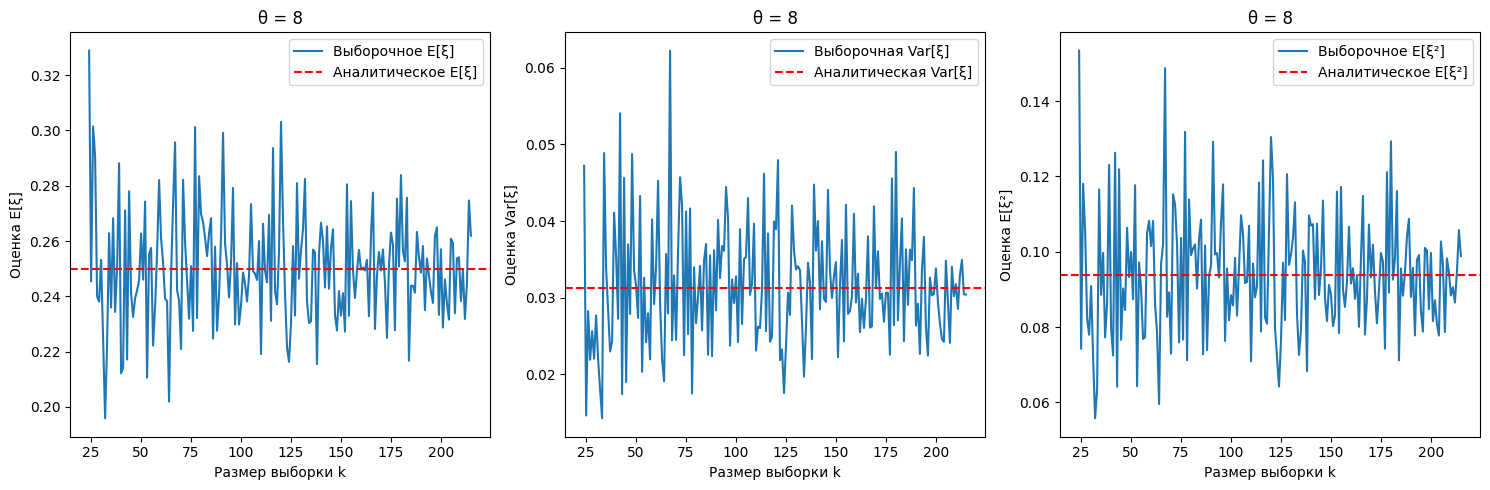

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
thetas = [0.5, 2, 8]
k_values = range(24, 216)

for theta in thetas:
    # Аналитические значения
    E_xi = 2 / theta
    Var_xi = 2 / theta**2
    E_xi2 = 6 / theta**2

    # Списки для хранения оценок
    estimates_E = []
    estimates_Var = []
    estimates_E2 = []

    for k in k_values:
        # Генерация выборки
        sample = np.random.gamma(shape=2, scale=1/theta, size=k)

        # Вычисление оценок
        mean_est = np.mean(sample)
        var_est = np.var(sample, ddof=1)  # Выборочная дисперсия
        mean_sq_est = np.mean(sample**2)

        estimates_E.append(mean_est)
        estimates_Var.append(var_est)
        estimates_E2.append(mean_sq_est)

    # Построение графиков
    plt.figure(figsize=(15, 5))

    # График для E[xi]
    plt.subplot(1, 3, 1)
    plt.plot(k_values, estimates_E, label='Выборочное E[ξ]')
    plt.axhline(y=E_xi, color='r', linestyle='--', label='Аналитическое E[ξ]')
    plt.xlabel('Размер выборки k')
    plt.ylabel('Оценка E[ξ]')
    plt.title(f'θ = {theta}')
    plt.legend()

    # График для Var[xi]
    plt.subplot(1, 3, 2)
    plt.plot(k_values, estimates_Var, label='Выборочная Var[ξ]')
    plt.axhline(y=Var_xi, color='r', linestyle='--', label='Аналитическая Var[ξ]')
    plt.xlabel('Размер выборки k')
    plt.ylabel('Оценка Var[ξ]')
    plt.title(f'θ = {theta}')
    plt.legend()

    # График для E[xi^2]
    plt.subplot(1, 3, 3)
    plt.plot(k_values, estimates_E2, label='Выборочное E[ξ²]')
    plt.axhline(y=E_xi2, color='r', linestyle='--', label='Аналитическое E[ξ²]')
    plt.xlabel('Размер выборки k')
    plt.ylabel('Оценка E[ξ²]')
    plt.title(f'θ = {theta}')
    plt.legend()

    plt.tight_layout()
    plt.show()



2. Дана плотность распределения случайной величины $ \xi $:

   $$
   f_{\xi}^{\lambda, a}(x) =
   \begin{cases}
   \lambda e^{-\lambda (x - a)}, & x \geq a \\
   0, & \text{иначе}
   \end{cases}
   $$

   Пусть $ (\lambda, a) = (2, 2) $

   (a) Аналитически вычислите значение моды, математического ожидания и медианы.

   (b) Создайте две выборки: одну довольно большого размера (например, 10000 наблюдений), а вторую маленькую (например, 20). Постройте оценки моды, математического ожидания и медианы.

   (c) Постройте для первой выборки на одном графике: гистограмму распределения значений из выборки и три вертикальных линии оценок моды, математического ожидания и медианы. Для второй выборки сделайте то же самое. Постройте ещё график рядом для первой выборки, но с функцией плотности распределения и аналитическими значениями моды, математического ожидания и медианы. То же самое для второй выборки.

   (d) Попробуйте изменять размер выборки и посмотреть, сходится ли медиана к математическому ожиданию.

### 2(a) Аналитически вычислите значение моды, математического ожидания и медианы.

Данная плотность представляет собой сдвинутую экспоненциальную функцию. Рассмотрим свойства экспоненциального распределения и учтем сдвиг.

1. **Мода ($\text{Mode}$)**

   Для экспоненциального распределения плотность убывает монотонно, следовательно, мода находится в точке начала определения распределения.

   $$
   \text{Mode} = a = 2
   $$

2. **Математическое ожидание ($E[\xi]$)**

   Математическое ожидание для сдвинутого экспоненциального распределения вычисляется как сумма точки сдвига и математического ожидания стандартного экспоненциального распределения.

   Для стандартного экспоненциального распределения с параметром $\lambda$:   
   $$
   E[X] = \frac{1}{\lambda}
   $$

   Следовательно,

   $$
   E[\xi] = a + \frac{1}{\lambda} = 2 + \frac{1}{2} = 2.5
   $$

3. **Медиана ($\text{Median}$)**

   Медиана для сдвинутого экспоненциального распределения определяется из уравнения:

   $$
   P(\xi \leq \text{Median}) = 0.5
   $$

   Для $x \geq a$:

   $$
   \int_{a}^{\text{Median}} \lambda e^{-\lambda (t - a)} dt = 0.5
   $$

   Вычисляем интеграл:

   $$
   \left[ -e^{-\lambda (t - a)} \right]_{a}^{\text{Median}} = 0.5
   $$
   $$
   -e^{-\lambda (\text{Median} - a)} + e^{0} = 0.5
   $$
   $$
   1 - e^{-\lambda (\text{Median} - a)} = 0.5
   $$
   $$
   e^{-\lambda (\text{Median} - a)} = 0.5
   $$
   $$
   -\lambda (\text{Median} - a) = \ln(0.5)
   $$
   $$
   \text{Median} = a + \frac{\ln(2)}{\lambda}
   $$
   
   Подставляем значения $\lambda = 2$ $a = 2$:

   $$
   \text{Median} = 2 + \frac{\ln(2)}{2} \approx 2 + 0.3466 = 2.3466
   $$

**Итоговые значения:**

$$
\boxed{
\begin{aligned}
\text{Mode} &= 2, \\
E[\xi] &= 2.5, \\
\text{Median} &\approx 2.3466.
\end{aligned}
}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Установка фиксированного зерна для воспроизводимости
np.random.seed(42)

# Параметры
lambda_param = 2
a = 2

# Функция для генерации сдвинутого экспоненциального распределения
def shifted_exponential(size, lambda_param, a):
    return np.random.exponential(scale=1/lambda_param, size=size) + a

# Генерация выборок
large_sample_size = 10000
small_sample_size = 20

large_sample = shifted_exponential(large_sample_size, lambda_param, a)
small_sample = shifted_exponential(small_sample_size, lambda_param, a)

# Функция для оценки моды
def estimate_mode(data, bins=30):
    counts, bin_edges = np.histogram(data, bins=bins)
    max_count_index = np.argmax(counts)
    mode_estimate = (bin_edges[max_count_index] + bin_edges[max_count_index + 1]) / 2
    return mode_estimate

# Вычисление оценок для большой выборки
large_mean = np.mean(large_sample)
large_median = np.median(large_sample)
large_mode = estimate_mode(large_sample)

# Вычисление оценок для маленькой выборки
small_mean = np.mean(small_sample)
small_median = np.median(small_sample)
small_mode = estimate_mode(small_sample)

# Вывод результатов
print("Большая выборка (10,000 наблюдений):")
print(f"Оценка математического ожидания: {large_mean:.4f}")
print(f"Оценка медианы: {large_median:.4f}")
print(f"Оценка моды: {large_mode:.4f}\n")

print("Маленькая выборка (20 наблюдений):")
print(f"Оценка математического ожидания: {small_mean:.4f}")
print(f"Оценка медианы: {small_median:.4f}")
print(f"Оценка моды: {small_mode:.4f}")

Большая выборка (10,000 наблюдений):
Оценка математического ожидания: 2.4887
Оценка медианы: 2.3392
Оценка моды: 2.0681

Маленькая выборка (20 наблюдений):
Оценка математического ожидания: 2.4125
Оценка медианы: 2.2788
Оценка моды: 2.0253


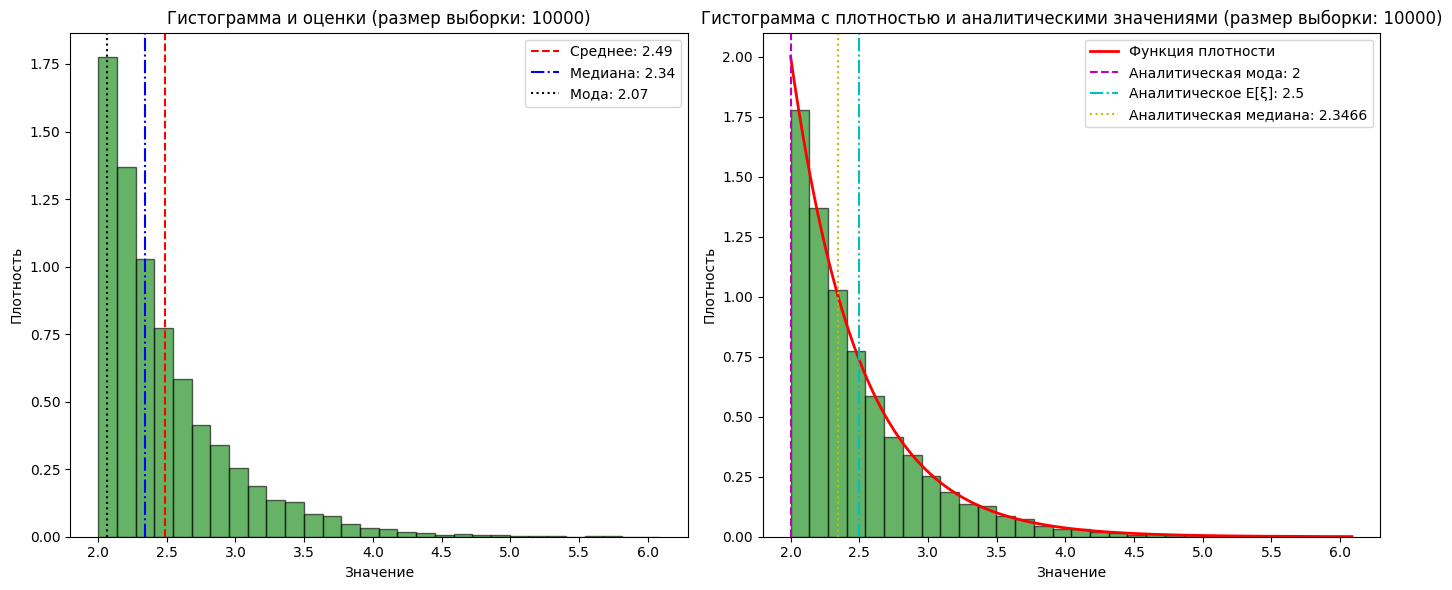

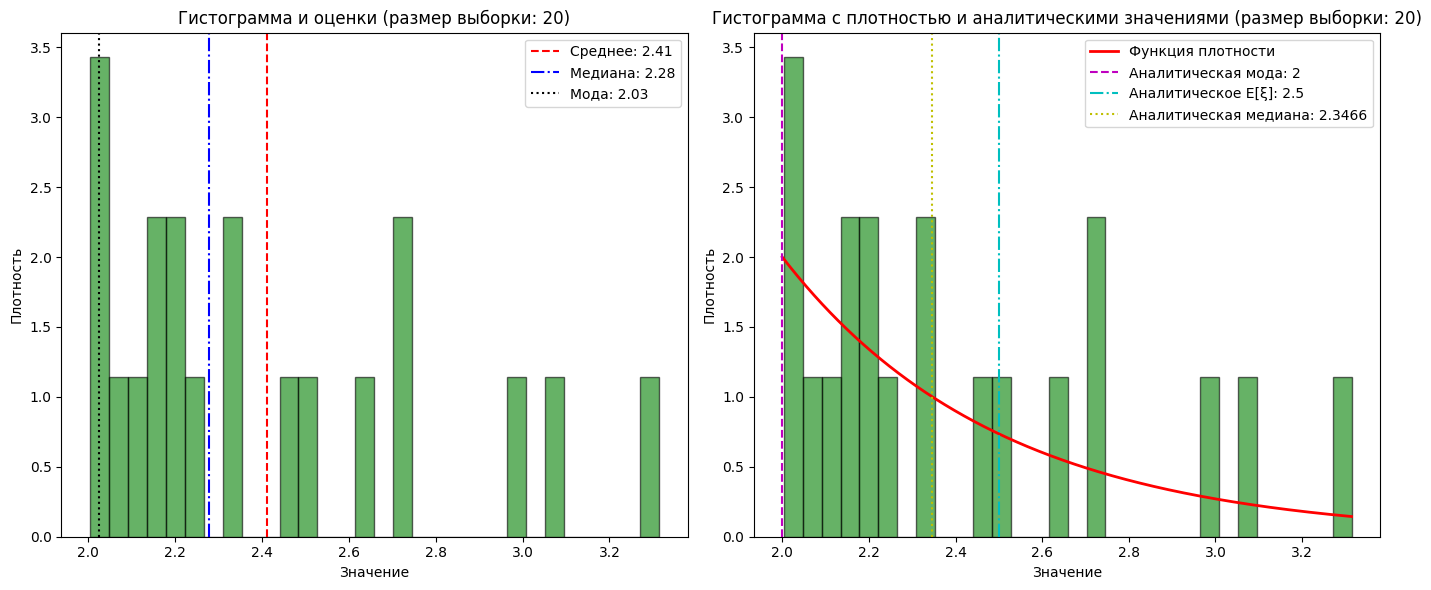

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Установка фиксированного зерна для воспроизводимости
np.random.seed(42)

# Параметры
lambda_param = 2
a = 2

# Функция для построения графиков
def plot_histogram_with_estimates(sample, mean, median, mode, sample_size, a, lambda_param):
    plt.figure(figsize=(14, 6))

    # Гистограмма с плотностью
    plt.subplot(1, 2, 1)
    count, bins, ignored = plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

    # Вертикальные линии для оценок
    plt.axvline(mean, color='r', linestyle='--', label=f'Среднее: {mean:.2f}')
    plt.axvline(median, color='b', linestyle='-.', label=f'Медиана: {median:.2f}')
    plt.axvline(mode, color='k', linestyle=':', label=f'Мода: {mode:.2f}')

    plt.title(f'Гистограмма и оценки (размер выборки: {sample_size})')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.legend()

    # Гистограмма с функцией плотности и аналитическими значениями
    plt.subplot(1, 2, 2)
    count, bins, ignored = plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

    # Функция плотности распределения
    x = np.linspace(a, np.max(sample), 1000)
    pdf = lambda_param * np.exp(-lambda_param * (x - a))
    plt.plot(x, pdf, 'r-', lw=2, label='Функция плотности')

    # Аналитические значения
    plt.axvline(a, color='m', linestyle='--', label=f'Аналитическая мода: {a}')
    plt.axvline(a + 1/lambda_param, color='c', linestyle='-.', label=f'Аналитическое E[ξ]: {a + 1/lambda_param}')
    plt.axvline(a + np.log(2)/lambda_param, color='y', linestyle=':', label=f'Аналитическая медиана: {a + np.log(2)/lambda_param:.4f}')

    plt.title(f'Гистограмма с плотностью и аналитическими значениями (размер выборки: {sample_size})')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Построение графиков для большой выборки
plot_histogram_with_estimates(
    sample=large_sample,
    mean=large_mean,
    median=large_median,
    mode=large_mode,
    sample_size=large_sample_size,
    a=a,
    lambda_param=lambda_param
)

# Построение графиков для маленькой выборки
plot_histogram_with_estimates(
    sample=small_sample,
    mean=small_mean,
    median=small_median,
    mode=small_mode,
    sample_size=small_sample_size,
    a=a,
    lambda_param=lambda_param
)

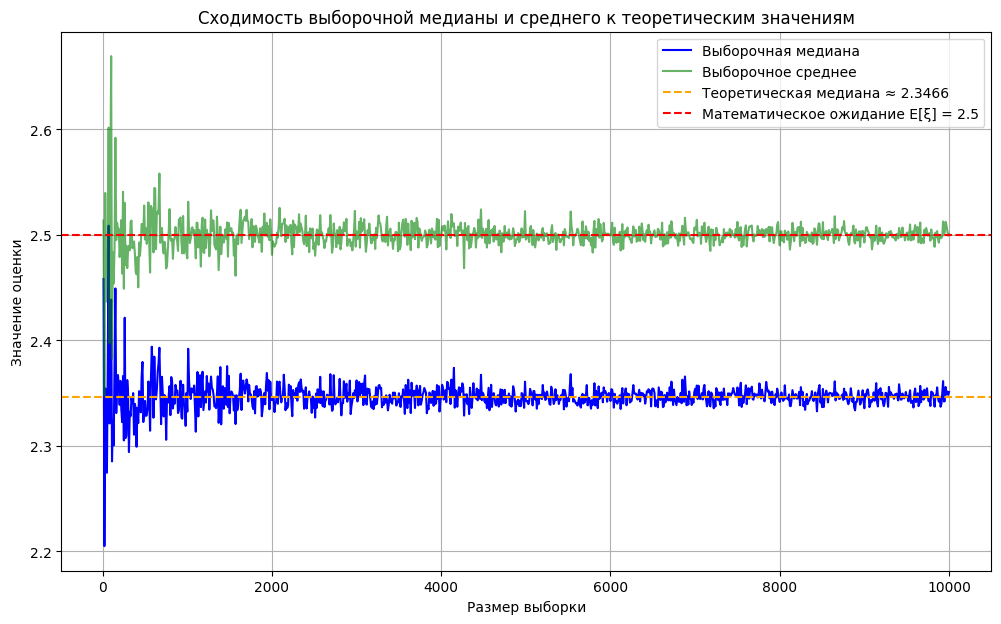

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Установка фиксированного зерна для воспроизводимости
np.random.seed(42)

# Параметры
lambda_param = 2
a = 2

# Диапазон размеров выборок
sample_sizes = range(10, 10001, 10)

# Списки для хранения выборочных медиан и средних
sample_medians = []
sample_means = []

# Теоретические значения
theoretical_median = a + np.log(2)/lambda_param
theoretical_mean = a + 1/lambda_param

# Генерация выборок и вычисление медиан и средних
for size in sample_sizes:
    sample = np.random.exponential(scale=1/lambda_param, size=size) + a
    median = np.median(sample)
    mean = np.mean(sample)
    sample_medians.append(median)
    sample_means.append(mean)

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(sample_sizes, sample_medians, label='Выборочная медиана', color='blue')
plt.plot(sample_sizes, sample_means, label='Выборочное среднее', color='green', alpha=0.6)
plt.axhline(y=theoretical_median, color='orange', linestyle='--', label=f'Теоретическая медиана ≈ {theoretical_median:.4f}')
plt.axhline(y=theoretical_mean, color='red', linestyle='--', label=f'Математическое ожидание E[ξ] = {theoretical_mean}')
plt.xlabel('Размер выборки')
plt.ylabel('Значение оценки')
plt.title('Сходимость выборочной медианы и среднего к теоретическим значениям')
plt.legend()
plt.grid(True)
plt.show()



## 1.2 Моделирование совместного распределения двух случайных величин

Пусть совместное распределение двух случайных величин задано таблицей:

| $ \xi \backslash \eta $ | 1 | 2 | 3 | ... |
|-------------------------|---|---|---|-----|
| $ -1 $                  | $ \frac{2}{5} \cdot \frac{1}{2^1} $ | $ \frac{2}{5} \cdot \frac{1}{2^2} $ | $ \frac{2}{5} \cdot \frac{1}{2^3} $ | ... |
| 0                       | $ \frac{1}{5} \cdot \frac{1}{2^1} $ | $ \frac{1}{5} \cdot \frac{1}{2^2} $ | $ \frac{1}{5} \cdot \frac{1}{2^3} $ | ... |
| 1                       | $ \frac{2}{5} \cdot \frac{1}{2^3} $ | $ \frac{2}{5} \cdot \frac{1}{2^2} $ | $ \frac{2}{5} \cdot \frac{1}{2^3} $ | ... |

где $ \eta $ принимает все значения из $ \mathbb{N} $. Вычислить корреляционную матрицу аналитически и приближенно (на основе моделирования).


### Аналитическое вычисление корреляционной матрицы

#### Проверка корректности распределения

Для каждой фиксированной $\xi$, сумма вероятностей по $\eta$ должна равняться вероятности $\xi$:

$$
\sum_{\eta=1}^{\infty} P(\xi, \eta) = P(\xi)
$$

Проверим это для каждой строки:

1. **Для $\xi = -1$:**

$$
\sum_{k=1}^{\infty} \frac{2}{5} \cdot \frac{1}{2^k} = \frac{2}{5} \cdot \sum_{k=1}^{\infty} \frac{1}{2^k} = \frac{2}{5} \cdot 1 = \frac{2}{5}
$$

2. **Для $\xi = 0$:**

$$
\sum_{k=1}^{\infty} \frac{1}{5} \cdot \frac{1}{2^k} = \frac{1}{5} \cdot \sum_{k=1}^{\infty} \frac{1}{2^k} = \frac{1}{5} \cdot 1 = \frac{1}{5}
$$

3. **Для $\xi = 1$:**

$$
\sum_{k=1}^{\infty} \frac{2}{5} \cdot \frac{1}{2^k} = \frac{2}{5} \cdot \sum_{k=1}^{\infty} \frac{1}{2^k} = \frac{2}{5} \cdot 1 = \frac{2}{5}
$$

**Итого:**

$$
P(\xi=-1) = \frac{2}{5}, \quad P(\xi=0) = \frac{1}{5}, \quad P(\xi=1) = \frac{2}{5}
$$

#### Проверка независимости случайных величин

Если для всех $\xi$ и $\eta$:

$$
P(\xi, \eta) = P(\xi) \cdot P(\eta)
$$

то величины $\xi$ и $\eta$ независимы.

В нашем случае:

$$
P(\eta=k) = \sum_{\xi} P(\xi, \eta=k) = \frac{2}{5} \cdot \frac{1}{2^k} + \frac{1}{5} \cdot \frac{1}{2^k} + \frac{2}{5} \cdot \frac{1}{2^k} = \frac{5}{5} \cdot \frac{1}{2^k} = \frac{1}{2^k}
$$

Поскольку:

$$
P(\xi, \eta=k) = P(\xi) \cdot P(\eta=k)
$$

следовательно, $\xi$ и $\eta$ **независимы**.

#### Вычисление математических ожиданий и дисперсий

**Для $\xi$:**

$$
E[\xi] = (-1) \cdot P(\xi=-1) + 0 \cdot P(\xi=0) + 1 \cdot P(\xi=1) = (-1) \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} = 0
$$

$$
E[\xi^2] = (-1)^2 \cdot P(\xi=-1) + 0^2 \cdot P(\xi=0) + 1^2 \cdot P(\xi=1) = 1 \cdot \frac{2}{5} + 0 + 1 \cdot \frac{2}{5} = \frac{4}{5}
$$

$$
Var(\xi) = E[\xi^2] - (E[\xi])^2 = \frac{4}{5} - 0 = \frac{4}{5}
$$

**Для $\eta$:**

Распределение $\eta$ — геометрическое с параметром $p = \frac{1}{2}$:

$$
P(\eta = k) = \frac{1}{2^k}, \quad k = 1,2,3,\dots
$$

Математическое ожидание и дисперсия геометрического распределения с $p = \frac{1}{2}$:

$$
E[\eta] = \frac{1}{p} = 2
$$

$$
Var(\eta) = \frac{1 - p}{p^2} = \frac{1 - \frac{1}{2}}{\left(\frac{1}{2}\right)^2} = \frac{\frac{1}{2}}{\frac{1}{4}} = 2
$$

#### Вычисление ковариации и корреляции

Поскольку $\xi$ и $\eta$ независимы:

$$
Cov(\xi, \eta) = E[\xi \eta] - E[\xi] E[\eta] = E[\xi] E[\eta] - E[\xi] E[\eta] = 0
$$

$$
\rho_{\xi,\eta} = \frac{Cov(\xi, \eta)}{\sqrt{Var(\xi) Var(\eta)}} = 0
$$

#### Итоговая аналитическая корреляционная матрица

$$
\boxed{
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
}
$$

где элементы на диагонали равны 1 (коэффициент корреляции переменных с самими собой), а вне диагонали — 0 (независимость).

### Приближённое вычисление корреляционной матрицы на основе моделирования

#### Генерация выборки

Для моделирования совместного распределения $(\xi, \eta)$, воспользуемся следующими шагами:

1. **Определение размеров выборки.** Например, $n = 10\,000$ наблюдений.

2. **Генерация значений $\xi$.**

   $\xi$ принимает значения из множества $\{-1, 0, 1\}$ с вероятностями:

   $$
   P(\xi = -1) = \frac{2}{5}, \quad P(\xi = 0) = \frac{1}{5}, \quad P(\xi = 1) = \frac{2}{5}
   $$

3. **Генерация значений $\eta$.**

   Поскольку $\xi$ и $\eta$ независимы, для каждого наблюдения $\eta$ генерируется независимо от $\xi$ согласно геометрическому распределению с $p = \frac{1}{2}$.

#### Вычисление выборочных характеристик

1. **Выборочные математические ожидания:**

   $$
   \hat{E}[\xi] = \frac{1}{n} \sum_{i=1}^{n} \xi_i
   $$

   $$
   \hat{E}[\eta] = \frac{1}{n} \sum_{i=1}^{n} \eta_i
   $$

2. **Выборочные дисперсии:**

   $$
   \hat{Var}(\xi) = \frac{1}{n-1} \sum_{i=1}^{n} (\xi_i - \hat{E}[\xi])^2
   $$

   $$
   \hat{Var}(\eta) = \frac{1}{n-1} \sum_{i=1}^{n} (\eta_i - \hat{E}[\eta])^2
   $$

3. **Выборочная ковариация:**

   $$
   \hat{Cov}(\xi, \eta) = \frac{1}{n-1} \sum_{i=1}^{n} (\xi_i - \hat{E}[\xi]) (\eta_i - \hat{E}[\eta])
   $$

4. **Выборочный коэффициент корреляции:**

   $$
   \hat{\rho}_{\xi,\eta} = \frac{\hat{Cov}(\xi, \eta)}{\sqrt{\hat{Var}(\xi) \cdot \hat{Var}(\eta)}}
   $$

In [ ]:
import numpy as np
import pandas as pd

# Установка фиксированного зерна для воспроизводимости
np.random.seed(42)

# Параметры
n = 10000  # Размер выборки

# Генерация значений xi
xi_values = np.array([-1, 0, 1])
xi_prob = np.array([2/5, 1/5, 2/5])
xi_sample = np.random.choice(xi_values, size=n, p=xi_prob)

# Генерация значений eta (геометрическое распределение с p=1/2)
# Параметр 'p' соответствует вероятности успеха, возвращает количество неудач +1
# Для нашей задачи P(eta=k) = (1-p)^{k-1} p, где p=1/2
eta_sample = np.random.geometric(p=0.5, size=n)

# Создание DataFrame
data = pd.DataFrame({
    'xi': xi_sample,
    'eta': eta_sample
})

# Вычисление выборочных характеристик
E_xi_sample = data['xi'].mean()
E_eta_sample = data['eta'].mean()
Var_xi_sample = data['xi'].var(ddof=1)
Var_eta_sample = data['eta'].var(ddof=1)
Cov_xi_eta_sample = data['xi'].cov(data['eta'])
Corr_xi_eta_sample = data['xi'].corr(data['eta'])

# Вывод результатов
print("Приближённые значения на основе моделирования (n = 10,000):")
print(f"Выборочное математическое ожидание E[ξ]: {E_xi_sample:.4f}")
print(f"Выборочное математическое ожидание E[η]: {E_eta_sample:.4f}")
print(f"Выборочная дисперсия Var[ξ]: {Var_xi_sample:.4f}")
print(f"Выборочная дисперсия Var[η]: {Var_eta_sample:.4f}")
print(f"Выборочная ковариация Cov[ξ, η]: {Cov_xi_eta_sample:.4f}")
print(f"Выборочный коэффициент корреляции ρ_{'{ξ, η}'}: {Corr_xi_eta_sample:.4f}")

Приближённые значения на основе моделирования (n = 10,000):
Выборочное математическое ожидание E[ξ]: -0.0166
Выборочное математическое ожидание E[η]: 2.0282
Выборочная дисперсия Var[ξ]: 0.7948
Выборочная дисперсия Var[η]: 2.0904
Выборочная ковариация Cov[ξ, η]: -0.0029
Выборочный коэффициент корреляции ρ_{ξ, η}: -0.0023


In [ ]:
import numpy as np
import pandas as pd

# Установка фиксированного зерна для воспроизводимости
np.random.seed(42)

# Функция для генерации выборки
def generate_sample(n, xi_prob, eta_p):
    xi_values = np.array([-1, 0, 1])
    xi_sample = np.random.choice(xi_values, size=n, p=xi_prob)
    eta_sample = np.random.geometric(p=eta_p, size=n)
    return xi_sample, eta_sample

# Параметры
xi_prob = np.array([2/5, 1/5, 2/5])
eta_p = 0.5

# Размеры выборок
sample_sizes = [20, 100, 1000, 10000]

for n in sample_sizes:
    xi_sample, eta_sample = generate_sample(n, xi_prob, eta_p)
    E_xi = np.mean(xi_sample)
    E_eta = np.mean(eta_sample)
    Var_xi = np.var(xi_sample, ddof=1)
    Var_eta = np.var(eta_sample, ddof=1)
    Cov_xi_eta = np.cov(xi_sample, eta_sample, ddof=1)[0,1]
    Corr_xi_eta = np.corrcoef(xi_sample, eta_sample)[0,1]

    print(f"\nРазмер выборки: {n}")
    print(f"Выборочное E[ξ]: {E_xi:.4f}")
    print(f"Выборочное E[η]: {E_eta:.4f}")
    print(f"Выборочная Var[ξ]: {Var_xi:.4f}")
    print(f"Выборочная Var[η]: {Var_eta:.4f}")
    print(f"Выборочная Cov[ξ, η]: {Cov_xi_eta:.4f}")
    print(f"Выборочный коэффициент корреляции ρ_{{ξ, η}}: {Corr_xi_eta:.4f}")


Размер выборки: 20
Выборочное E[ξ]: -0.1500
Выборочное E[η]: 1.8500
Выборочная Var[ξ]: 0.8711
Выборочная Var[η]: 1.6079
Выборочная Cov[ξ, η]: -0.4974
Выборочный коэффициент корреляции ρ_{ξ, η}: -0.4203

Размер выборки: 100
Выборочное E[ξ]: -0.0500
Выборочное E[η]: 1.9000
Выборочная Var[ξ]: 0.8359
Выборочная Var[η]: 1.4444
Выборочная Cov[ξ, η]: -0.0354
Выборочный коэффициент корреляции ρ_{ξ, η}: -0.0322

Размер выборки: 1000
Выборочное E[ξ]: 0.0060
Выборочное E[η]: 1.9940
Выборочная Var[ξ]: 0.8088
Выборочная Var[η]: 1.9559
Выборочная Cov[ξ, η]: 0.0311
Выборочный коэффициент корреляции ρ_{ξ, η}: 0.0247

Размер выборки: 10000
Выборочное E[ξ]: -0.0151
Выборочное E[η]: 2.0313
Выборочная Var[ξ]: 0.7928
Выборочная Var[η]: 2.0991
Выборочная Cov[ξ, η]: -0.0125
Выборочный коэффициент корреляции ρ_{ξ, η}: -0.0097


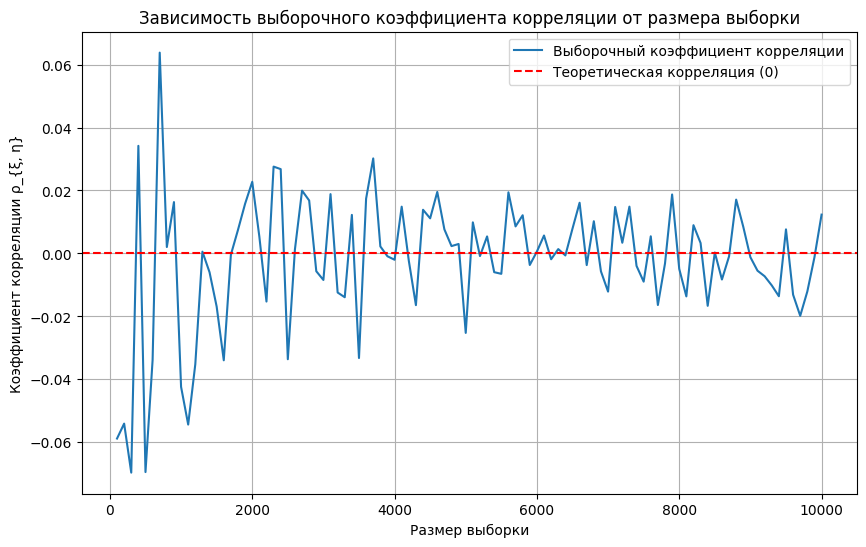

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Установка фиксированного зерна для воспроизводимости
np.random.seed(42)

# Параметры
xi_prob = np.array([2/5, 1/5, 2/5])
eta_p = 0.5
max_n = 10000
step = 100
sample_sizes = range(100, max_n + 1, step)

corr_coefficients = []

for n in sample_sizes:
    xi_sample, eta_sample = generate_sample(n, xi_prob, eta_p)
    Corr_xi_eta = np.corrcoef(xi_sample, eta_sample)[0,1]
    corr_coefficients.append(Corr_xi_eta)

# Построение графика
plt.figure(figsize=(10,6))
plt.plot(sample_sizes, corr_coefficients, label='Выборочный коэффициент корреляции')
plt.axhline(y=0, color='r', linestyle='--', label='Теоретическая корреляция (0)')
plt.xlabel('Размер выборки')
plt.ylabel('Коэффициент корреляции ρ_{ξ, η}')
plt.title('Зависимость выборочного коэффициента корреляции от размера выборки')
plt.legend()
plt.grid(True)
plt.show()